# Tarea: Árboles de decisión
Alisson García Mejía

Instrucciones:
* Generar el árbol de decisión con máximo 3 divisiones más de profundidad
* Cálcular la matriz de confusion
* Comparar con la matriz de confusión del árbol generado sin podar

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

path = '/Users/alisson/PycharmProjects/Neurociencias-2025-2/S03_datasets/iris/iris.csv'
df = pd.read_csv(path)

df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [97]:
x, y = df.iloc[:, :-1], df.iloc[:, -1]

from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=3,  random_state=99)
clf.fit(x, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=99)

In [98]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

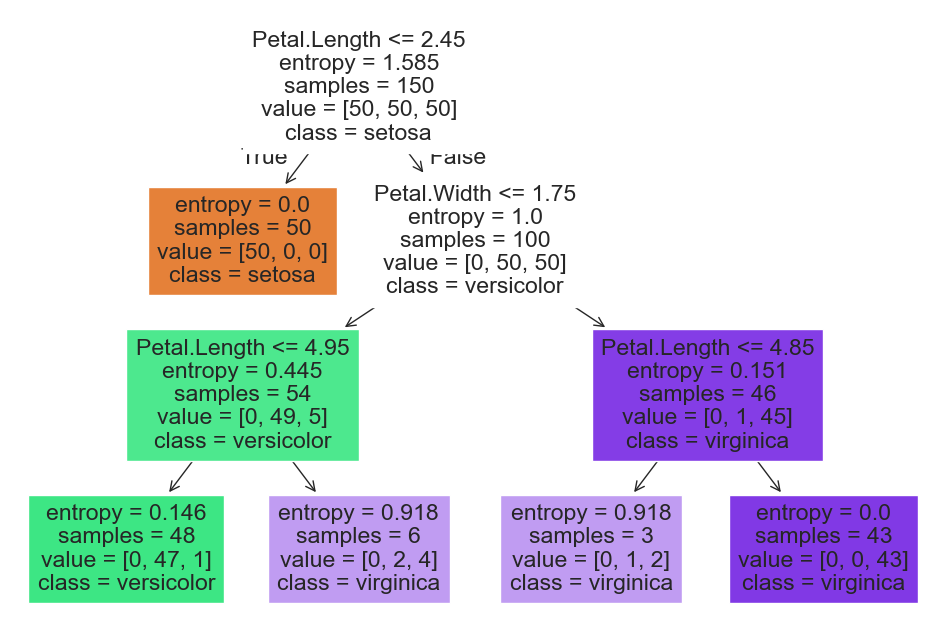

In [99]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=df.columns[:-1], class_names=df['Species'].unique())
plt.show()

In [100]:
observado = clf.predict(x)

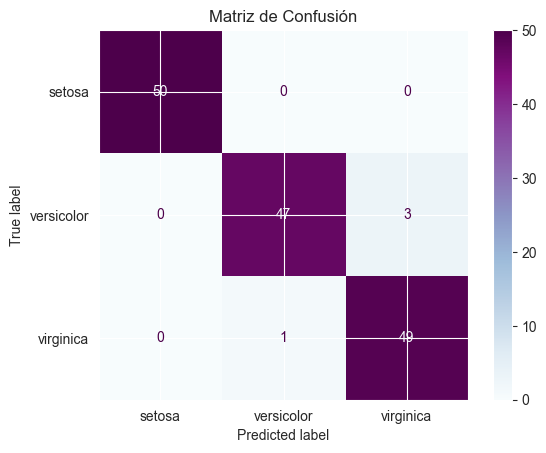

In [101]:
cm = confusion_matrix(y, observado)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df['Species'].unique())
disp.plot(cmap='BuPu')
plt.title('Matriz de Confusión')
plt.show()

In [102]:
# Ahora del árbol sin podar

clfSP = DecisionTreeClassifier(criterion='entropy', random_state=99) #aquí ya no se pone max_depth para que tome en cuenta todo
clfSP.fit(x, y)


DecisionTreeClassifier(criterion='entropy', random_state=99)

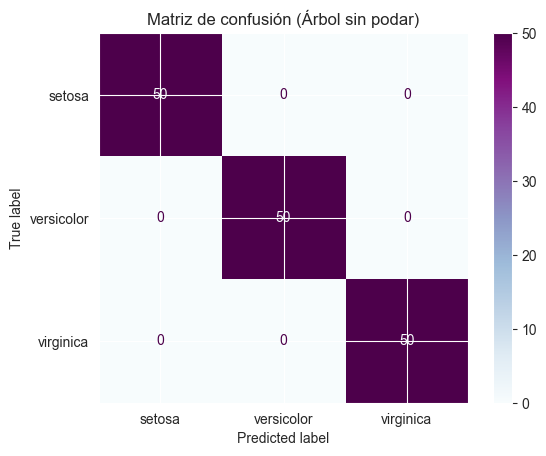

In [103]:
observadoSP = clfSP.predict(x)
cmSP = confusion_matrix(y, observadoSP)

#mostrar la matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cmSP, display_labels=df['Species'].unique())
disp.plot(cmap='BuPu')
plt.title('Matriz de confusión (Árbol sin podar)')
plt.show()


Podemos ver que en la matriz de confusión del árbol sin podar tiene una perfecta predicción en entrenamiento, a diferencia del "árbol podado" donde controlamos su profundidad y por lo tanto es menos perfecto en entrenamiento porque muestra algunos errores en la matriz. Sin embargo, esto no quiere decir que es bueno que sea mejor en el entrenamiento porque al realizar el test, un árbol sin podar tendrá más errores, porque se le entrenó para casos específicos y no se adapta bien. Por lo que un árbol podado tendrá un buen rendimiento (no perfecto) en el entrenamiento, pero será similar o mejor en el test y, por lo tanto, habrá menor riesgo de fallar al ingresar nuevos datos.